<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part6_P244ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!git clone https://github.com/hansjang/Py_Radar.git

import shutil
shutil.move('Py_Radar/data', '/content/data')

# 폴더와 그 안의 모든 파일을 삭제
# !rm -rf /content/Py_Radar
# !rm -rf /content/data

Cloning into 'Py_Radar'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 210 (delta 18), reused 0 (delta 0), pack-reused 166 (from 1)
Receiving objects: 100% (210/210), 7.11 MiB | 11.41 MiB/s, done.
Resolving deltas: 100% (104/104), done.


'/content/data'

## Bagging

### ensemble.BaggingClassifier


In [3]:
import numpy as np
import pandas as pd

breast = pd.read_csv('/content/data/breast-cancer.csv')
display(breast.head())
display(breast['diagnosis'].value_counts())

# 결측치
display(breast.isna().sum())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,count
diagnosis,
B,357
M,212


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [4]:
# x, y 분리
breast['diagnosis'] = np.where(breast['diagnosis'] == "M", 1, 0)  # M : 악성, B : 양성
features = ['area_mean', 'area_worst']
x = breast[features]
y = breast['diagnosis']

# 데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.7,
                                                    stratify = y,
                                                    random_state = 1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(398, 2) (398,) (171, 2) (171,)


Accuracy Score : 0.92
         Pred[0]  Pred[1]
True[0]      102        5
True[1]        8       56


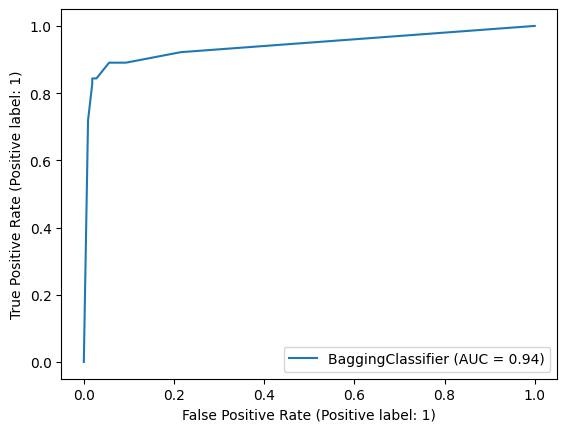

ROC AUC Score:  0.94
OOB Score: 0.92


In [16]:
# Bagging Classifier로 모델 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator = DecisionTreeClassifier(),
                         oob_score = True,
                        random_state = 42)

# 학습 평가
pred = clf.fit(train_x, train_y).predict(test_x)
print("Accuracy Score :", round(clf.score(test_x, test_y), 2))

from sklearn.metrics import confusion_matrix
matrix = pd.DataFrame(confusion_matrix(test_y, pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Pred[0]', 'Pred[1]'])
print(matrix)

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, test_x, test_y)
plt.show()

# ROC AUC 점수 계산
R_A_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])  # 전체 데이터 사용
print("ROC AUC Score: ", round(R_A_score, 2))

# oob_score 출력
oob = clf.oob_score_
print("OOB Score:", round(oob, 2))

### ensemble.BaggingRegressor

In [20]:
import numpy as np
import pandas as pd

car = pd.read_csv('/content/data/CarPrice_Assignment.csv')
print(car.info())

# 결측치
display(car.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [23]:
# x, y 분리
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']
print(x.shape, y.shape)

# 모델 학습
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(estimator = DecisionTreeRegressor(),
                       oob_score = True,
                       n_estimators=50, # 추정기 개수(n_estimators)를 50으로 설정
                       random_state = 42)
reg = reg.fit(x, y)
print(round(reg.oob_score_, 2))

(205, 13) (205,)
0.93


### ensemble.AdaBoostClassifier

(398, 2) (398,) (171, 2) (171,)
Accuracy Score : 0.94
[[105   2]
 [  9  55]]


정확도	93.57%
정밀도	96.49%
재현율	85.94%
F1점수	90.91%


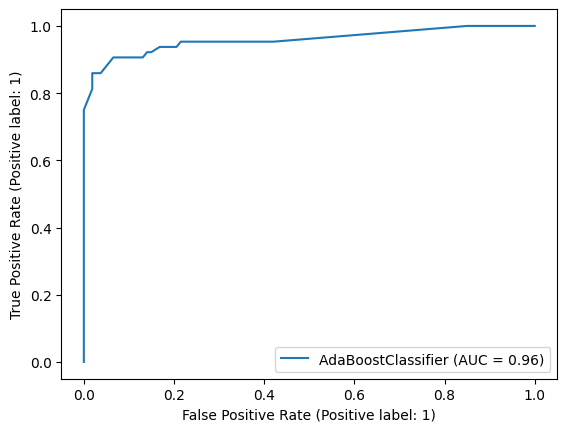

ROC AUC Score:  0.96


In [27]:
import numpy as np
import pandas as pd

breast = pd.read_csv('/content/data/breast-cancer.csv')

# x, y 분리
breast['diagnosis'] = np.where(breast['diagnosis'] == "M", 1, 0)  # M : 악성, B : 양성
features = ['area_mean', 'area_worst']
x = breast[features]
y = breast['diagnosis']

# 데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.7,
                                                    stratify = y,
                                                    random_state = 1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

# AdaBoostClassifier로 모델 학습
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(estimator = None,
                        random_state = 42)

# 학습 평가
pred = clf.fit(train_x, train_y).predict(test_x)
print("Accuracy Score :", round(clf.score(test_x, test_y), 2))

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

pred = clf.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc * 100, 2)))  # 정확도	93.57%
print('정밀도\t{}%'.format(round(test_prc * 100, 2)))  # 정밀도	96.49%
print('재현율\t{}%'.format(round(test_rll * 100, 2)))  # 재현율	85.94%
print('F1점수\t{}%'.format(round(test_f1 * 100, 2)))   # F1점수	90.91%

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, test_x, test_y)
plt.show()

# ROC AUC 점수 계산
R_A_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])  # 전체 데이터 사용
print("ROC AUC Score: ", round(R_A_score, 2))

### ensemble.AdaBoostRegressor


In [36]:
import numpy as np
import pandas as pd

car = pd.read_csv('/content/data/CarPrice_Assignment.csv')

# x, y 분리
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']
print(x.shape, y.shape)

# 데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7,
                                                    random_state = 1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

# AdaBoostRegressor로 모델 학습
from sklearn.ensemble import AdaBoostRegressor
reg =AdaBoostRegressor(estimator = None,
                        random_state = 42)

# 성능 평가
pred = reg.fit(train_x, train_y).predict(test_x)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_y, pred)
mae = mean_absolute_error(test_y, pred)
rmse = np.sqrt(mse)
acc  = reg.score(test_x, test_y)
print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc*100, 3)))

(205, 13) (205,)
(143, 13) (143,) (62, 13) (62,)
MSE	5711128.916
MAE	1858.392
RMSE	2389.797
ACC	90.54%


### ensemble.RandomForestClassifier

In [35]:
import numpy as np
import pandas as pd

breast = pd.read_csv('/content/data/breast-cancer.csv')

# x, y 분리
breast['diagnosis'] = np.where(breast['diagnosis'] == "M", 1, 0)  # M : 악성, B : 양성
features = ['area_mean', 'area_worst']
x = breast[features]
y = breast['diagnosis']

# 데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.7,
                                                    stratify = y,
                                                    random_state = 1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

# 모델 학습
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100,
                             min_samples_split = 5)

pred = clf.fit(train_x, train_y).predict(test_x)

print("정확도 : ", clf.score(test_x, test_y))

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc * 100, 2)))  # 정확도	91.81%
print('정밀도\t{}%'.format(round(test_prc * 100, 2)))  # 정밀도	91.67%
print('재현율\t{}%'.format(round(test_rll * 100, 2)))  # 재현율 85.94%
print('F1점수\t{}%'.format(round(test_f1 * 100, 2)))   # F1점수	88.71%



(398, 2) (398,) (171, 2) (171,)
정확도 :  0.9181286549707602
[[102   5]
 [  9  55]]


정확도	91.81%
정밀도	91.67%
재현율	85.94%
F1점수	88.71%


### ensemble.RandomForestRegressor

In [37]:
import numpy as np
import pandas as pd

car = pd.read_csv('/content/data/CarPrice_Assignment.csv')

# x, y 분리
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
x = car_num[features]
y = car_num['price']
print(x.shape, y.shape)

# 데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7,
                                                    random_state = 1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

# 모델 학습
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

# 성능 평가
pred = reg.fit(train_x, train_y).predict(test_x)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_y, pred)
mae = mean_absolute_error(test_y, pred)
rmse = np.sqrt(mse)
acc = reg.score(test_x, test_y)
print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc*100, 3)))

(205, 13) (205,)
(143, 13) (143,) (62, 13) (62,)
MSE	4202670.036
MAE	1342.442
RMSE	2050.041
ACC	93.039%
